# Exploratory Data Analysis

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math

In [7]:
"""
Read in the initial cohort
"""
initial_cohort = pd.read_csv("../data/initial_cohort_final.csv", index_col=0)

In [10]:
"""
Columns names and checking for NA values
"""
missing_values = initial_cohort.isna().sum()
print(missing_values)

subject_id                       0
hadm_id                          0
stay_id                          0
n_stays                          0
sum_los                          0
                             ...  
phenylephrine                91544
vasopressin                 116831
dobutamine                  141929
milrinone                   132330
icu_vasopressin_timediff     12728
Length: 70, dtype: int64


In [9]:
"""
Descriptive statistics
"""
initial_cohort.describe(include="all")

,subject_id,hadm_id,stay_id,n_stays,sum_los,gender,admission_age,suspected_infection,admission_type,weight,...,icu_intime,starttime,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,icu_vasopressin_timediff
count,1.451870e+05,1.451870e+05,1.451870e+05,145187.000000,145187.000000,145187,145187.000000,135423.000000,145187,143274.000000,...,132459,132459,4237.000000,27154.000000,72935.000000,53643.000000,28356.000000,3258.000000,12857.000000,132459.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8,NaN,...,4977,67740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,EW EMER.,NaN,...,2112-05-07 18:39:04,2181-04-20 11:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,88777,NaN,NaN,58713,NaN,...,234,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.492479e+07,2.501178e+07,3.499565e+07,1.384752,11.304277,NaN,63.235235,0.946523,NaN,88.583883,...,NaN,NaN,8.475667,0.048737,0.180830,1.349731,2.511126,5.188476,0.352342,11.462739
std,2.917769e+06,2.885977e+06,2.884559e+06,0.724206,10.309564,NaN,15.058439,0.224983,NaN,24.685484,...,NaN,NaN,17.361284,0.065884,0.496003,4.539599,3.012303,3.139076,1.077307,6.920540
min,1.000235e+07,2.000136e+07,3.000015e+07,1.000000,3.300000,NaN,18.000000,0.000000,NaN,1.000000,...,NaN,NaN,0.500005,0.004000,0.000700,0.009401,0.120000,0.416731,0.030000,-93.000000
25%,1.236445e+07,2.255673e+07,3.252813e+07,1.000000,4.880000,NaN,54.000000,1.000000,NaN,71.750000,...,NaN,NaN,4.003674,0.020018,0.060033,0.500200,2.400000,2.501894,0.250094,6.000000
50%,1.490802e+07,2.503613e+07,3.494689e+07,1.000000,7.420000,NaN,65.000000,1.000000,NaN,85.300000,...,NaN,NaN,6.010280,0.030046,0.120048,0.999803,2.400000,5.004133,0.256313,11.000000
75%,1.745576e+07,2.748410e+07,3.748643e+07,2.000000,13.790000,NaN,74.000000,1.000000,NaN,100.900000,...,NaN,NaN,10.063905,0.050086,0.239504,1.593158,2.409638,5.286218,0.499924,17.000000


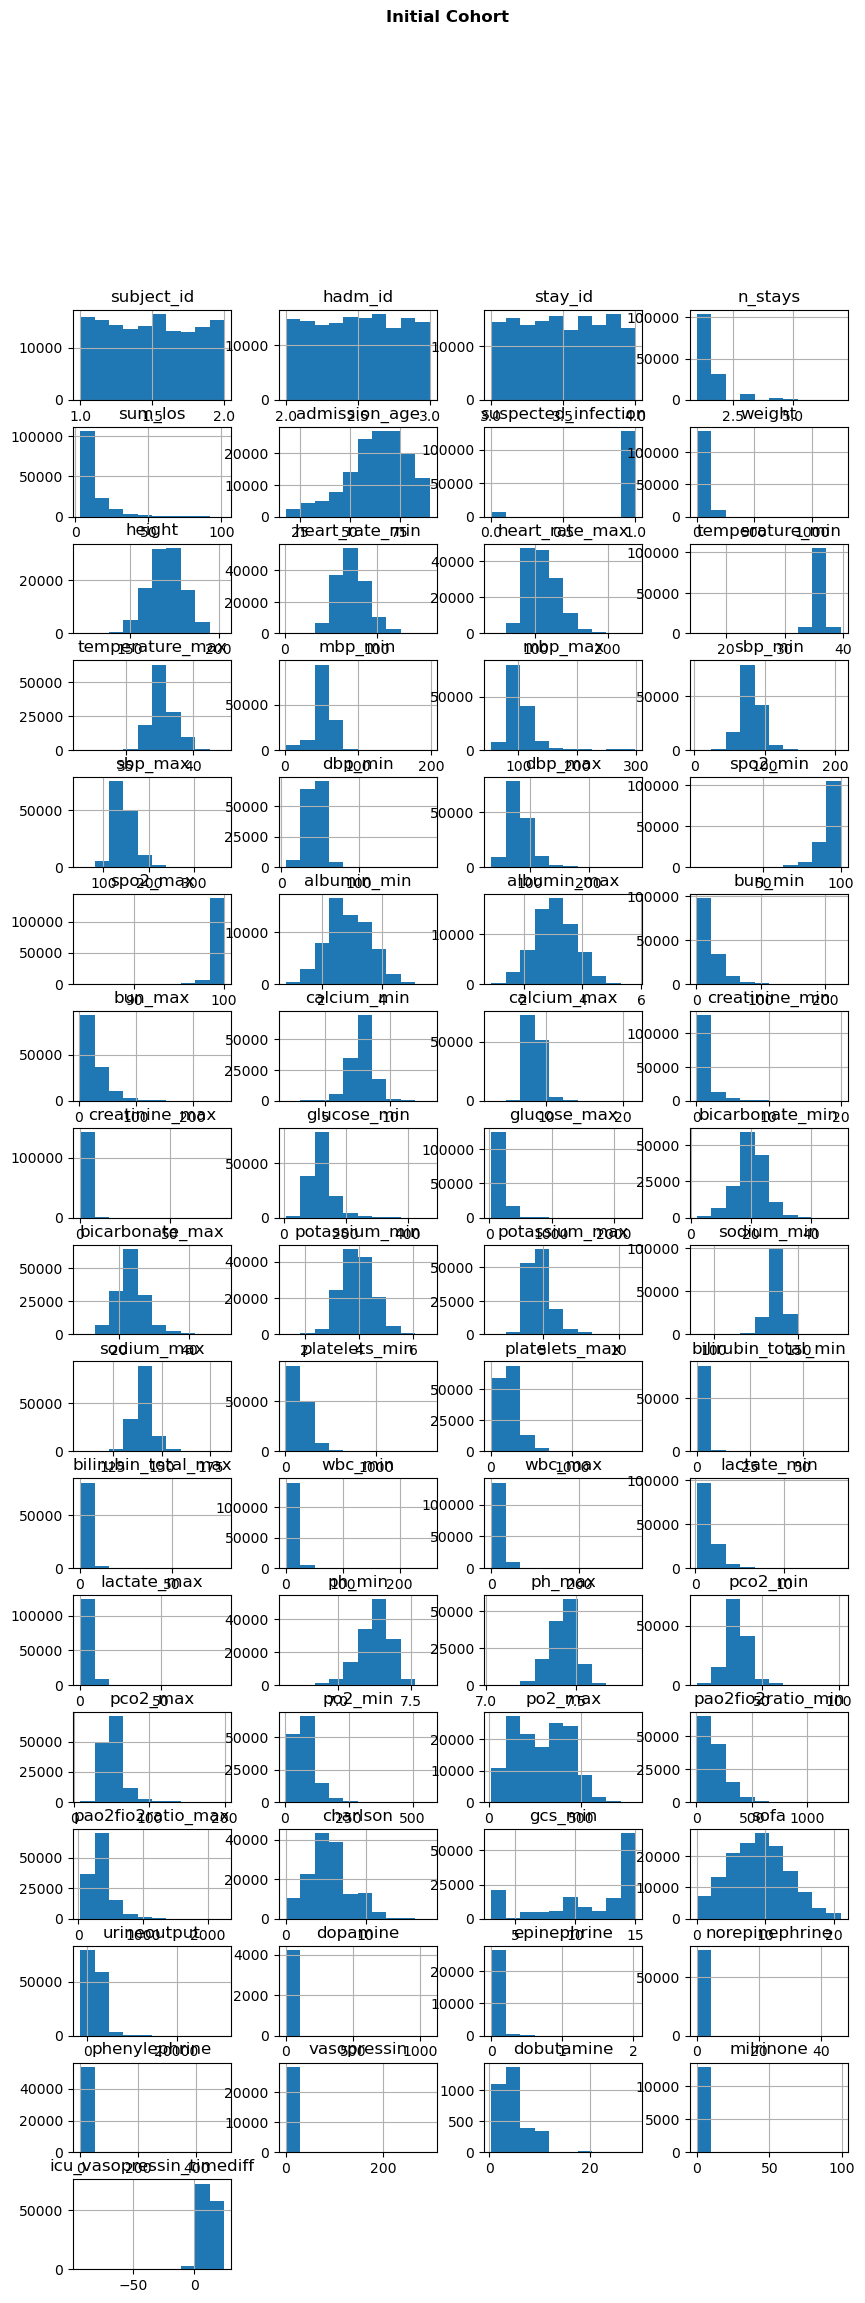

In [11]:
def plot_df_histogram(df, title:str, figsize:tuple=(10,4), **kwargs):
    """
    Plots a histogram from the dataframe
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
        figsize (tuple): Size of the figure to pass to pyplot.figure
    """
    df.hist(figsize=figsize, **kwargs)
    plt.suptitle(title, fontweight="semibold")
    plt.show()

plot_df_histogram(
    initial_cohort,
    title="Initial Cohort",
    figsize=(10, 30),
    layout=(20,4)
)

Column gender is not numeric
Column admission_type is not numeric
Column ventilation_status is not numeric
Column icu_intime is not numeric
Column starttime is not numeric
Column epinephrine is not numeric
Column norepinephrine is not numeric
Column phenylephrine is not numeric
Column vasopressin is not numeric
Column dobutamine is not numeric
Column milrinone is not numeric
Column icu_vasopressin_timediff is not numeric


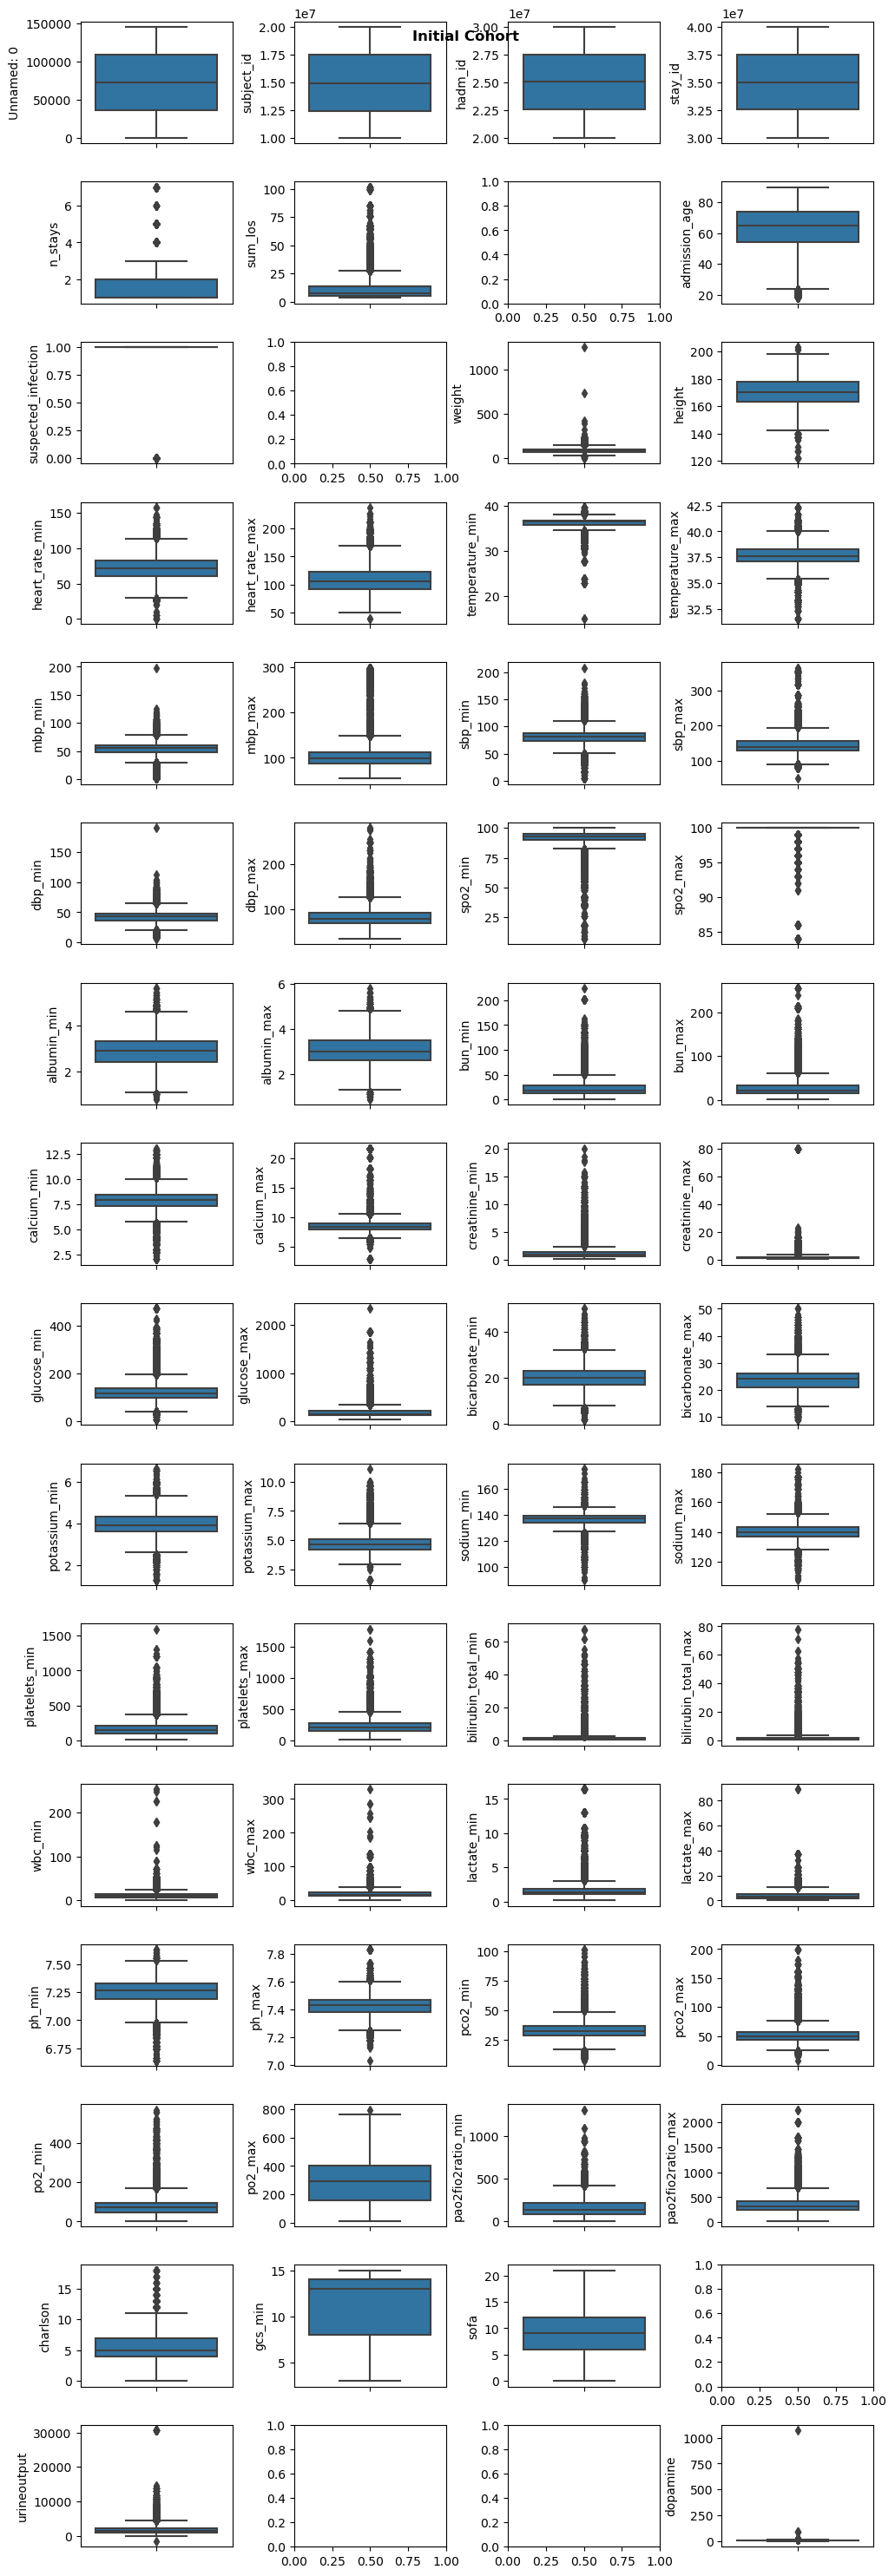

In [6]:
def plot_cohort_statistics(df, title:str, layout=(1, 4), figsize=(10,10)):
    """
    Use a boxplot to visualise the numerical features
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
    """
    row, col = layout
    width, height = figsize
    fig, axs = plt.subplots(row, col)
    fig.set_size_inches(width, height)
    fig.suptitle(title, fontweight="semibold")
    fig.tight_layout()
    
    df_plt = df.copy()

    for i, column in enumerate(df_plt):
        r = math.floor(i / col)
        c = i % col
        try:
            sns.boxplot(y=df_plt[column], ax=axs[r][c])
        except:
            print(f"Column {column} is not numeric")
            continue
    
    plt.show()

plot_cohort_statistics(
    initial_cohort,
    title="Initial Cohort",
    figsize=(10, 30),
    layout=(16,4)
)